¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

SPRINT 10. APRENDIZAJE AUTOMATICO EN NEGOCIOS. 
---

Encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.
Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
Después de la evaluación de riesgo, mantendremos solo las regiones con riesgo de pérdidas inferior al 2.5%. Hay que seleccionar la región con el beneficio promedio más alto.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from scipy import stats as st
from matplotlib import pyplot as plt

LOCALIDAD #0
---

In [2]:
geo_0 = pd.read_csv('dataset/geo_data_0.csv')
geo_0.info()
display(geo_0.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [3]:
#REVISION DE VALORES NULOS Y DUPLICADOS.
print('Valores nulos ->\n',geo_0.isna().sum())
print('\nValores duplicados -> ',geo_0.duplicated().sum())

Valores nulos ->
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Valores duplicados ->  0


In [4]:
print('- Mayor cantidad de litros de un pozo en la primera localidad: ',geo_0['product'].max())
print(geo_0[geo_0['product']==geo_0['product'].max()])
print('\n- Menor cantidad de litros de un pozo en la primera localidad: ',geo_0['product'].min())
print(geo_0[geo_0['product']==geo_0['product'].min()])

print('\n* Mediana de los litros en la primera localidad: ',geo_0['product'].median())
print('* Media de los litros en la primera localidad: ',geo_0['product'].mean())

values_sorted = geo_0['product'].sort_values(ascending= False).head(20)
print('\n> Tenemos {} pozos con mas de 100 unidades.'.format(geo_0['product'][geo_0['product']>100].count()))
print('> Tenemos {} pozos entre 90 y 100 unidades '.format(geo_0['product'][(geo_0['product']<100) & (geo_0['product']>89)].count()))
print('> Tenemos {} pozos con menos de 20 unidades.'.format(geo_0['product'][geo_0['product']<20].count()))
#print(values_sorted)

- Mayor cantidad de litros de un pozo en la primera localidad:  185.3643474222929
         id        f0        f1       f2     product
8826  rjMou  1.797736  0.098212  6.14826  185.364347

- Menor cantidad de litros de un pozo en la primera localidad:  0.0
          id        f0        f1        f2  product
57263  zCM5W -0.702064  0.375992  0.236572      0.0

* Mediana de los litros en la primera localidad:  91.84997204396296
* Media de los litros en la primera localidad:  92.50000000000001

> Tenemos 45094 pozos con mas de 100 unidades.
> Tenemos 6426 pozos entre 90 y 100 unidades 
> Tenemos 3914 pozos con menos de 20 unidades.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración inicial de los datos. En este punto ya tienes una idea general de cómo están distribuidos los datos de las diferentes regiones.
</div>

In [5]:
#Division de datasets en conjuntos 
features_0 = geo_0.drop(['id','product'],axis = 1)
target_0 = geo_0['product']

features_train_0 , features_valid_0 , target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size= 0.25, random_state= 54321)

print(features_train_0.shape, features_valid_0.shape)
print(target_train_0.shape, target_valid_0.shape)

display(features_train_0.head())
display(features_valid_0.head())

(75000, 3) (25000, 3)
(75000,) (25000,)


,f0,f1,f2
91512,1.047314,-0.588520,7.192957
10859,1.921060,-0.086840,3.336267
6246,0.360579,1.024094,1.989392
39091,-0.375138,0.964283,4.179138
91459,-0.878584,0.809862,5.932856


,f0,f1,f2
47590,1.514790,-0.188060,3.665070
39469,1.639174,-0.518934,4.792929
88291,0.061831,0.498935,2.018771
46565,0.548405,-0.327277,1.783483
55316,-0.072231,0.923705,2.914132


In [6]:
#ESCALAR LOS DATOS.
numeric = ['f0', 'f1', 'f2']
scaler_0 = StandardScaler()
scaler_0.fit(features_train_0[numeric])
features_train_0[numeric] = scaler_0.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler_0.transform(features_valid_0[numeric])

display(features_train_0.head())

display(features_valid_0.head())

,f0,f1,f2
91512,0.623271,-1.659687,1.441806
10859,1.626421,-0.666008,0.254240
6246,-0.165170,1.534423,-0.160495
39091,-1.009849,1.415956,0.513780
91459,-1.587856,1.110092,1.053791


,f0,f1,f2
47590,1.159982,-0.866496,0.355486
39469,1.302788,-1.521858,0.702781
88291,-0.508163,0.494238,-0.151448
46565,0.050473,-1.142243,-0.223899
55316,-0.662080,1.335581,0.124254


In [7]:
print('Promedio del conjunto de entrenamiento de las unidades de reservas en los pozos de petróleo --> {:.3f} unidades'.format(target_train_0.mean()))
print('Promedio del conjunto de validacion de las unidades de reservas en los pozos de petróleo --> {:.3f} unidades'.format(target_valid_0.mean()))

Promedio del conjunto de entrenamiento de las unidades de reservas en los pozos de petróleo --> 92.472 unidades
Promedio del conjunto de validacion de las unidades de reservas en los pozos de petróleo --> 92.584 unidades


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo segmentando y escalando la información. El escalado te puede ser muy útil para mejorar el rendimiento del modelo al asegurar que todas las características tienen el mismo rango. 
</div>



**MODELO REGRESION LINEAL L#0**

ERROR CUADRATICO MEDIO

RAIZ DEL ERROR CUADRATICO MEDIO

In [8]:
#MODELO LINEAR REGRESSION DE LA PRIMERA LOCALIDAD.
model_0 = LinearRegression()
model_0.fit(features_train_0,target_train_0)

predictions_valid_0 = model_0.predict(features_valid_0)
mse_0 = mean_squared_error(target_valid_0 , predictions_valid_0)
recm_0 = mse_0**0.5
print('MSE = {:.3f}'.format(mse_0))
print('RECM = {:.3f}'.format(recm_0))

MSE = 1420.039
RECM = 37.683


Tenemos un RECM de 37.68 litros de petroleo mal predichos, si lo comparamos con el promedio total de barriles -> 92.47

Hagamos una prueba de cordura para saber si es un RECM aceptable. 

**PRUEBA DE CORDURA (MSE Y RECM)**

Veamos el MSE y el RECM obtenido por un modelo con un valor constante. 

In [9]:
#PRUEBA DE CORDURA.
predictions_valid_constant_0 = pd.Series(target_train_0.mean(), index= target_valid_0.index)
mse_const0 = mean_squared_error(target_valid_0, predictions_valid_constant_0)
recm_const0 = mse_const0 ** 0.5

print('MSE = {:.3f}'.format(mse_const0))
print('RECM = {:.3f}'.format(recm_const0))

MSE = 1955.434
RECM = 44.220


La diferencia de RECM es de 7 litros, esto podría considerarse un buena prediccion.
Nuestro modelo predice mejor que un modelo constante, por lo que es mejor que solo utilizar el promedio del total de litros.

**COEFICIENTE DE DETERMINACION**

Esta metrica divide el ECM del modelo entre el ECM media y luego se resta el valor obtenido de uno. 

Revisemos si la metrica aumenta, la calidad del modelo también mejora. 


In [10]:
R2_0 = r2_score(target_valid_0, predictions_valid_0)
print('R2 = {:.3f}'.format(R2_0))


R2 = 0.274


Tenemos un 0.27 de 1, no estamos ni en la mitad, pero es algo. 

**ERROR ABSOLUTO MEDIO.**

Con esta metrica podemos revisar la precision de nuestro modelo. <br> Midiendo el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. 


In [11]:
print('Nuestro Error promedio absoluto de la Localidad 0 --> {:.3f}'.format(mean_absolute_error(target_valid_0 , predictions_valid_0)))

Nuestro Error promedio absoluto de la Localidad 0 --> 31.044


Tenemos un error medio absoluto de 31 litros, revisemos con la mediana de los litros si es mejor que un modelo constante. 


In [12]:
#PREUBA DE CORDURA PARA EL MAE.
predictions_valid_constmedian_0 = pd.Series(target_train_0.median(), index= target_valid_0.index)
print(mean_absolute_error(target_valid_0 , predictions_valid_constmedian_0))

37.62201179904536


La diferencia en el MAE es de 6 litros, esto podría considerarse un buena prediccion.

Nuestro modelo predice mejor que un modelo constante, por lo que es mejor que solo utilizar la mediana del total de litros de petroleo.

Tenemos un un Error Absoluto Medio bajo, de solo 31 unidades con diferencia a la prueba de cordura con 37.6 unidades. <br>
Nuestro modelo logra hacer mejores predicciones que un modelo constante utilizando solo la mediana. <br>


LOCALIDAD #1
---

In [13]:
geo_1 = pd.read_csv('dataset/geo_data_1.csv')
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
print('+ Mayor cantidad de unidades de un pozo en la segunda localidad: {:.3f}'.format(geo_1['product'].max()))

print('\n- Menor cantidad de unidades de un pozo en la segunda localidad: ',geo_1['product'].min())

print('\n* Mediana de las unidades en la segunda localidad: {:.3f}'.format(geo_1['product'].median()))
print('* Media de las uniadades en la segunda localidad: {:.3f}'.format(geo_1['product'].mean()))

values_sorted = geo_1['product'].sort_values(ascending= False).head(20)
print('\n> Tenemos {} pozos con mas de 100 unidades.'.format(geo_1['product'][geo_1['product']>100].count()))
print('> Tenemos {} pozos entre 90 y 100 unidades '.format(geo_1['product'][(geo_1['product']<100) & (geo_1['product']>89)].count()))
print('> Tenemos {} pozos con menos de 20 unidades.'.format(geo_1['product'][geo_1['product']<20].count()))

+ Mayor cantidad de unidades de un pozo en la segunda localidad: 137.945

- Menor cantidad de unidades de un pozo en la segunda localidad:  0.0

* Mediana de las unidades en la segunda localidad: 57.086
* Media de las uniadades en la segunda localidad: 68.825

> Tenemos 33041 pozos con mas de 100 unidades.
> Tenemos 0 pozos entre 90 y 100 unidades 
> Tenemos 16572 pozos con menos de 20 unidades.


In [15]:
features_1 = geo_1.drop(['product','id'], axis = 1)
target_1 = geo_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size= 0.25, random_state= 54321)

print(features_train_1.shape, features_valid_1.shape)
print(target_train_1.shape, target_valid_1.shape)

display(features_train_1.head())
display(features_valid_1.head())

(75000, 3) (25000, 3)
(75000,) (25000,)


,f0,f1,f2
91512,-5.259719,-7.915228,0.005090
10859,8.956305,-3.585838,2.997366
6246,-4.692128,2.830963,1.000511
39091,-11.257950,-4.265647,3.999363
91459,-8.430500,-5.197694,5.001518


,f0,f1,f2
47590,12.167120,8.448401,1.000711
39469,-4.615780,-6.076121,-0.000970
88291,18.498442,-1.967833,3.991104
46565,-6.280526,-2.518864,1.997804
55316,-7.329280,5.661661,4.000831


In [16]:
numeric = ['f0', 'f1', 'f2']
scaler_1 = StandardScaler()
scaler_1.fit(features_train_1[numeric])
features_train_1[numeric] = scaler_1.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler_1.transform(features_valid_1[numeric])

display(features_train_1.head())

display(features_valid_1.head())

,f0,f1,f2
91512,-0.714581,-0.606875,-1.463609
10859,0.871883,0.237221,0.292307
6246,-0.651239,1.488297,-0.879480
39091,-1.383964,0.104680,0.880296
91459,-1.068430,-0.077040,1.468377


,f0,f1,f2
47590,1.230200,2.583522,-0.879362
39469,-0.642719,-0.248306,-1.467165
88291,1.936755,0.552682,0.875449
46565,-0.828500,0.445248,-0.294252
55316,-0.945537,2.040195,0.881157


In [17]:
#MODELO LINEAR REGRESSION DE LA PRIMERA LOCALIDAD.
model_1 = LinearRegression()
model_1.fit(features_train_1 , target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)

mse_1 = mean_squared_error(target_valid_1, predictions_valid_1)
recm_1 = mse_1 ** 0.5
print('MSE = {:.3f}'.format(mse_1))
print('RECM = {:.3f}'.format(recm_1))

MSE = 0.796
RECM = 0.892


In [38]:
#PRUEBA DE CORDURA
predictions_valid_constant_1 = pd.Series(target_train_1.mean(), index= target_valid_1.index)
mse_const1 = mean_squared_error(target_valid_1 , predictions_valid_constant_1)
recm_const1 = mse_const1 ** 0.5

print('Prueba de cordura. MSE = {:.3f}'.format( mse_const1))
print('Prueba de cordura. RECM = {:.3f}'.format(recm_const1))

Prueba de cordura. MSE = 2107.859
Prueba de cordura. RECM = 45.911


**COEFICIENTE DE DETERMINACION**

Revisemos si la metrica R2 aumenta, de este modo sabremos si la calidad del modelo es alta. 

In [19]:
R2_1 = r2_score(target_valid_1, predictions_valid_1)
print('R2 = {:.4f}'.format(R2_1))

R2 = 0.9996


**ERROR ABSOLUTO MEDIO**<br>
Revisemos la precision de nuestro modelo para la Localidad #1. <br>
Midiendo el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. 

In [20]:
print('MEAN ABSOLUTE ERROR -> {:.4f}'.format(mean_absolute_error(target_valid_1 , predictions_valid_1)))

MEAN ABSOLUTE ERROR -> 0.7184


In [21]:
#PREUBA DE CORDURA PARA EL MAE.
predictions_valid_constmedian_1 = pd.Series(target_train_1.median(), index= target_valid_1.index)
print(mean_absolute_error(target_valid_1 , predictions_valid_constmedian_1))

40.15683151534529


En la Localidad #1 tenemos una prediccion muy buena de parte del modelo de Regresion Lineal. 
En el valor  R2 tenemos casi un 1 y como error absoluto medio tenemos 0.71 unidades, esto es casi 0 de error en las predicciones con respecto a los valores reales de los pozos.<br> Si utilizaramos la media como valor constante en las predicciones tendriamos un valor de error absoluto medio de 40 unidades, esto son muchas unidades en comparacion con la mediana total de los pozos (57.086 unidades) que utizamos para entrenar el modelo. 

LOCALIDAD #2
---


In [22]:
geo_2 = pd.read_csv('dataset/geo_data_2.csv')
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [23]:
print('+ Mayor cantidad de unidades de un pozo en la tercera localidad: {:.3f}'.format(geo_2['product'].max()))
print('\n- Menor cantidad de unidades de un pozo en la tercera localidad: {:.3f}'.format(geo_2['product'].min()))

print('\n* Mediana de los unidades en la tercera localidad: {:.3f}'.format(geo_2['product'].median()))
print('* Media de los unidades en la tercera localidad: {:.3f}'.format(geo_2['product'].mean()))

values_sorted = geo_2['product'].sort_values(ascending= False).head(20)
print('\n> Tenemos {} pozos con mas de 100 unidades.'.format(geo_2['product'][geo_2['product']>100].count()))
print('> Tenemos {} pozos entre 90 y 100 unidades '.format(geo_2['product'][(geo_2['product']<100) & (geo_2['product']>89)].count()))
print('> Tenemos {} pozos con menos de 20 unidades.'.format(geo_2['product'][geo_2['product']<20].count()))

+ Mayor cantidad de unidades de un pozo en la tercera localidad: 190.030

- Menor cantidad de unidades de un pozo en la tercera localidad: 0.000

* Mediana de los unidades en la tercera localidad: 94.926
* Media de los unidades en la tercera localidad: 95.000

> Tenemos 47077 pozos con mas de 100 unidades.
> Tenemos 6623 pozos entre 90 y 100 unidades 
> Tenemos 3920 pozos con menos de 20 unidades.


In [24]:
features_2 = geo_2.drop(['product','id'], axis = 1)
target_2 = geo_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size= 0.25, random_state= 54321)

print(features_train_2.shape, features_valid_2.shape)
print(target_train_2.shape, target_valid_2.shape)

display(features_train_2.head())
display(features_valid_2.head())

(75000, 3) (25000, 3)
(75000,) (25000,)


,f0,f1,f2
91512,2.757381,1.614820,7.521468
10859,1.412403,-0.703433,2.794668
6246,-2.046829,0.681573,3.269953
39091,-1.413053,0.920717,1.549329
91459,0.045615,-0.758936,5.377495


,f0,f1,f2
47590,2.441476,0.005062,1.740010
39469,2.067213,0.319923,3.771649
88291,-0.550469,0.148153,-3.234745
46565,0.503663,-2.445467,4.963118
55316,-0.158206,-0.036463,-2.219084


In [25]:
#MODELO LINEAR REGRESSION DE LA SEGUNDA LOCALIDAD.
model_2 = LinearRegression()
model_2.fit(features_train_2 , target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)

mse_2 = mean_squared_error(target_valid_2, predictions_valid_2)
recm_2 = mse_2 ** 0.5
print('MSE = {:.3f}'.format(mse_2))
print('RECM = {:.3f}'.format(recm_2))

MSE = 1612.224
RECM = 40.153


In [26]:
#PRUEBA DE CORDURA
predictions_valid_constant_2 = pd.Series(target_train_2.mean(), index= target_valid_2.index)
mse_const2 = mean_squared_error(target_valid_2 , predictions_valid_constant_2)
recm_const2 = mse_const2 ** 0.5

print('MSE = {:.3f}'.format( mse_const2))
print('RECM = {:.3f}'.format(recm_const2))

MSE = 2021.040
RECM = 44.956


**COEFICIENTE DE DETERMINACION**

Revisemos si la metrica R2 es alta, de este modo sabremos si tenemos una buena calidad en nuestro modelo para la Localidad #2. 

In [27]:
R2_2 = r2_score(target_valid_2, predictions_valid_2)
print('R2 = {:.4f}'.format(R2_2))

R2 = 0.2023


**ERROR ABSOLUTO MEDIO**

Revisemos la precision de nuestro modelo para la Localidad #2. <br>
Midiendo el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. 

In [28]:
print('MEAN ABSOLUTE ERROR -> {:.3f} unidades'.format(mean_absolute_error(target_valid_2 , predictions_valid_2)))

MEAN ABSOLUTE ERROR -> 32.891 unidades


In [29]:
#PREUBA DE CORDURA PARA EL MAE.
predictions_valid_constmedian_2 = pd.Series(target_train_2.median(), index= target_valid_2.index)
print('MEAN ABSOLUTE ERROR En la prueba de cordura -> {:.3f} unidades'.format(mean_absolute_error(target_valid_2 , predictions_valid_constmedian_2)))

MEAN ABSOLUTE ERROR En la prueba de cordura -> 38.000 unidades


Nuestro modelo parece tener buena prediccion, tenemos 38 unidades de error abosluto medio utilizando la mediana como valor constante. <br>
Con el modelo de Regresion Lineal tenemos casi 33 unidades de producto de error absoluto medio.

**Conclusion**

En este punto podemos comparar la calidad de los modelos para cada localidad:

* Loc.0 <br> R2 = 0.274 <br> MEAN ABSOLUTE ERROR --> 31.044 unidades

* Loc. 1 <br> R2 = 0.9996 <br> MEAN ABSOLUTE ERROR -> 0.7184 unidades

* Loc. 2 <br> R2 = 0.2023 <br> MEAN ABSOLUTE ERROR -> 32.891 unidades

En la localidad #1 podemos ver que tenemos una calidad en las predicciones de casi 100% con un 99.96%. <br>
Si vemos el error absoluto medio estamos muy cera del valor original, con una diferencia de solo 0.7 unidades entre los valores reales y los predichos. 

En las locaciones #0 y #2 temos un R2 parecido, el modelo generó unas predicciones en estas dos localidades con unas calidad de 0.2, es decir de 31 y 32 unidades de diferencia con el valor de unidades correcto. 



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Implementaste el modelo de regresión logística de forma excelente para los 3 conjuntos de datos! En este punto ya puedes obervar cuál es el modelo con el mayor $R^2$ y menor RMSE. Con esto resultados cuál región tiene mejores resultados?
</div>

CALCULO DE BENEFICIOS TOTALES.
---

Revisaremos la ganancia total de los pozos de cada localidad para calcular el beneficio que se obtendrá de ellos. 
Primero tomaremos 500 pozos y seleccionamos los 200 mejores para cada localidad, despues calcularemos el beneficio total. 

Como segunda comprobacion para hacer un mejor analisis haremos lo mismo, tomaremos 500 pozos, seleccionaremos los 200 mejores, pero esta vez lo haremos 1000 veces. 
Calcularemos el beneficio promedio de estas muestras. 


In [30]:
state_0 = np.random.RandomState(54321)
predictions_valid_0 = pd.Series(predictions_valid_0, index=target_valid_0.index)

probs_subsample_0 = predictions_valid_0.sample(n=500, replace= True, random_state= state_0).sort_values(ascending=False).reset_index()[:200]
pozos_0 = probs_subsample_0[:200]
print(pozos_0.shape)
mean_pozos_0 = pozos_0[0].mean()
print('LOC#0 -> El promedio de los 200 mejores pozos es de {:.3f}'.format(mean_pozos_0))


(200, 2)
LOC#0 -> El promedio de los 200 mejores pozos es de 115.307


In [31]:
predictions_valid_1 = pd.Series(predictions_valid_1, index=target_valid_1.index)
state_1 = np.random.RandomState(54321)

probs_subsample_1 = predictions_valid_1.sample(n=500, replace= True, random_state= state_1).sort_values(ascending=False).reset_index()
pozos_1 = probs_subsample_1[:200]

mean_pozos_1 = pozos_1[0].mean()
print('LOC#1 -> El promedio de los 200 mejores pozos es de {:.3f}'.format(mean_pozos_1))

LOC#1 -> El promedio de los 200 mejores pozos es de 115.024


In [32]:
predictions_valid_2 = pd.Series(predictions_valid_2, index=target_valid_2.index)
state_2 = np.random.RandomState(54321)

probs_subsample_2 = predictions_valid_2.sample(n=500, replace= True, random_state= state_2).sort_values(ascending=False).reset_index()
pozos_2 = probs_subsample_2[:200]

mean_pozos_2 = pozos_2[0].mean()
print('LOC#2 -> El promedio de los 200 mejores pozos es de {:.3f}'.format(mean_pozos_2))

LOC#2 -> El promedio de los 200 mejores pozos es de 114.861


In [33]:
def calculos (pozos,loc):
    num_pozos = 200
    ganancia_x_barril = 4.5
    gananciaxunidad = ganancia_x_barril * 1000
    inversion = 100000000
    mu_produccion = 500000

    print('Promedio de las unidades de los 200 mejores pozos de la Loc. {} --> {:.3f} unidades'.format(loc,pozos.mean()))
    ingresos_pozo = (pozos * gananciaxunidad).sum()
    print('Obtendremos ${:.2f} (dolares) por {:.3f} unidades de los 200 pozos de la Loc {}'.format(ingresos_pozo,pozos.sum(),loc))
    beneficio_bruto = (ingresos_pozo.sum()) - inversion
    margen_beneficio_bruto = (beneficio_bruto/ingresos_pozo)*100
    print('Nuestro Beneficio bruto es -> ${:.2f}'.format(beneficio_bruto))
    print('Nuestro Margen de Beneficio bruto es -> {:.3f}%'.format(margen_beneficio_bruto))
    print('\n---\n')


In [34]:
calculos(pozos_0[0],0)
calculos(pozos_1[0],1)
calculos(pozos_2[0],2)

Promedio de las unidades de los 200 mejores pozos de la Loc. 0 --> 115.307 unidades
Obtendremos $103775863.46 (dolares) por 23061.303 unidades de los 200 pozos de la Loc 0
Nuestro Beneficio bruto es -> $3775863.46
Nuestro Margen de Beneficio bruto es -> 3.638%

---

Promedio de las unidades de los 200 mejores pozos de la Loc. 1 --> 115.024 unidades
Obtendremos $103521648.74 (dolares) por 23004.811 unidades de los 200 pozos de la Loc 1
Nuestro Beneficio bruto es -> $3521648.74
Nuestro Margen de Beneficio bruto es -> 3.402%

---

Promedio de las unidades de los 200 mejores pozos de la Loc. 2 --> 114.861 unidades
Obtendremos $103374588.04 (dolares) por 22972.131 unidades de los 200 pozos de la Loc 2
Nuestro Beneficio bruto es -> $3374588.04
Nuestro Margen de Beneficio bruto es -> 3.264%

---



**Conclusion de los 200 mejores pozos**

Con esta muestra 200 pozos, la mejor opcion para sacar el mejor benficio bruto de las 3 localidades es la LOCALIDAD #0.

+  1° En la Localidad #0 con un beneficio bruto de $3775863.46
+  2° En la Localidad #1 con un beneficio bruto de $3521648.74
+  3° En la Localidad #2 con un beneficio bruto de $3374588.04

Tenemos una diferencia mínima entra la localidad 0 y la localidad 1, solo de $254,214.72 dolares. Sin embargo, esa cantidad extra nos entrega un margen de beneficio burto del 3.64 en la localicadad #0, poniendola como la mejor localidad en la que invertir. 

Hay que agregar mas muestras para seguir analizando y llegar a una conclusion más exacta.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien calculado el beneficio bruto de las 3 regiones! Estos cálculos te ayudarán en la elección de la mejor región teniendo en cuenta también los beneficios brutos según las predicciones, pero a pesar de que el beneficio bruto sea mayor en tu conjunto data2, es necesario comprobar los riesgos que implica.
</div>



**CON BOOSTRAPPING DE 1000 MUESTRAS.**

Realizaremos los mismos calculos pero ahora 1000 veces para tener una muestra mas grande y verificar que localidad tienen un mejor beneficio. 
Así que de igualmanera calculeremos el intervalo de confianza del 95%, es decir 2.5% en el cuantil inferior y 97.5% en el cuantil superior. 

In [35]:
def calculos (pozos):
    num_pozos = 200
    ganancia_x_barril = 4.5
    gananciaxunidad = ganancia_x_barril * 1000
    inversion = 100000000

    ingresos_pozo = (pozos * gananciaxunidad).sum()
    beneficio_bruto = (ingresos_pozo.sum()) - inversion
    margen_beneficio_bruto = (beneficio_bruto/ingresos_pozo)*100
    pozos_mean = pozos.mean()
    pozos_sum = pozos.sum()

    return beneficio_bruto

In [36]:
def muestras (predictions_valid):
    state = np.random.RandomState(54321)
    beneficio = []
    perdida_de_beneficio = []

    for i in range(1000):
        pozos_subsample = predictions_valid.sample(n=500, replace= True, random_state= state).sort_values(ascending=False).reset_index()
        pozos = pozos_subsample[:200]
        beneficio.append(calculos(pozos[0]))
        if beneficio[i] <0 :
            perdida_de_beneficio.append(beneficio[i])
            num_de_perdida = len(perdida_de_beneficio)
        
    beneficio = pd.Series(beneficio)
    return beneficio, perdida_de_beneficio

LOCALIDAD #0 
* Beneficio promedio de la locacion 0 despues de 1000 muestras -> $3159655.25
+ Tenemos un intervalo de confianza del 95% de $814469.29 a $5429608.20 en el beneficio total de las 1000 muestras de los 200 mejores pozos.
  Con un espectro de $4615138.91.
- Tenemos una probabilidad de --> 0.006 de obtener una perdida despues de 1000 muestras, en porcentaje de --> 0.6%

--
LOCALIDAD #1 
* Beneficio promedio de la locacion 1 despues de 1000 muestras -> $4086764.03
+ Tenemos un intervalo de confianza del 95% de $152523.69 a $8343369.80 en el beneficio total de las 1000 muestras de los 200 mejores pozos.
  Con un espectro de $8190846.11.
- Tenemos una probabilidad de --> 0.022 de obtener una perdida despues de 1000 muestras, en porcentaje de --> 2.2%

--
LOCALIDAD #2 
* Beneficio promedio de la locacion 2 despues de 1000 muestras -> $2708714.45
+ Tenemos un intervalo de confianza del 95% de $735898.40 a $4689197.86 en el beneficio total de las 1000 muestras de los 200 mejores po

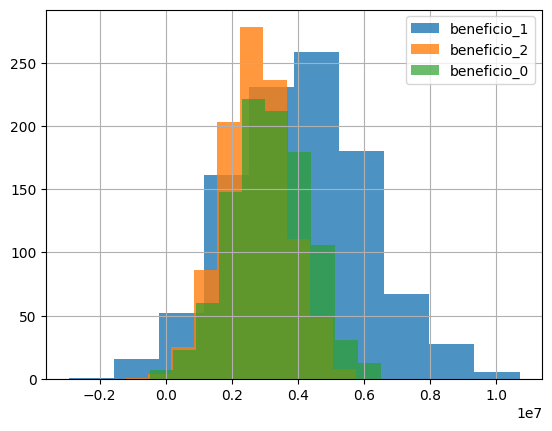

In [37]:
#Beneficio de la Localidad #0
beneficio_0, perdida_0 = muestras(predictions_valid_0)
print('LOCALIDAD #0 \n* Beneficio promedio de la locacion 0 despues de 1000 muestras -> ${:.2f}'.format(beneficio_0.mean()))
print('+ Tenemos un intervalo de confianza del 95% de ${:.2f} a ${:.2f} en el beneficio total de las 1000 muestras de los 200 mejores pozos.\n  Con un espectro de ${:.2f}.'
      .format(beneficio_0.quantile(0.025),beneficio_0.quantile(0.975),(beneficio_0.quantile(0.975) - beneficio_0.quantile(0.025))))
print('- Tenemos una probabilidad de --> {} de obtener una perdida despues de 1000 muestras, en porcentaje de --> {}%'
      .format(len(perdida_0)/1000,(len(perdida_0)/10)))

#Beneficio de la Localidad #1
beneficio_1, perdida_1 = muestras(predictions_valid_1)
print('\n--\nLOCALIDAD #1 \n* Beneficio promedio de la locacion 1 despues de 1000 muestras -> ${:.2f}'.format(beneficio_1.mean()))
print('+ Tenemos un intervalo de confianza del 95% de ${:.2f} a ${:.2f} en el beneficio total de las 1000 muestras de los 200 mejores pozos.\n  Con un espectro de ${:.2f}.'
      .format(beneficio_1.quantile(0.025),beneficio_1.quantile(0.975),(beneficio_1.quantile(0.975) - beneficio_1.quantile(0.025))))
print('- Tenemos una probabilidad de --> {} de obtener una perdida despues de 1000 muestras, en porcentaje de --> {}%'
      .format(len(perdida_1)/1000,(len(perdida_1)/10)))

#Beneficio de la Localidad #2
beneficio_2, perdida_2 = muestras(predictions_valid_2)
print('\n--\nLOCALIDAD #2 \n* Beneficio promedio de la locacion 2 despues de 1000 muestras -> ${:.2f}'.format(beneficio_2.mean()))
print('+ Tenemos un intervalo de confianza del 95% de ${:.2f} a ${:.2f} en el beneficio total de las 1000 muestras de los 200 mejores pozos.\n  Con un espectro de ${:.2f}.'
      .format(beneficio_2.quantile(0.025),beneficio_2.quantile(0.975),(beneficio_2.quantile(0.975) - beneficio_2.quantile(0.025))))
print('- Tenemos una probabilidad de --> {} de obtener una perdida despues de 1000 muestras, en porcentaje de --> {}%'
      .format(len(perdida_2)/1000,(len(perdida_2)/10)))

#HISTOGRAMA.
beneficio_1.hist(alpha=0.8)
beneficio_2.hist(alpha=0.8)
beneficio_0.hist(alpha=0.7)
plt.legend(['beneficio_1','beneficio_2','beneficio_0'])

CONCLUSIONES
---

-- LOCALIDAD #0 

* Beneficio promedio de 1000 muestras -> $3,159,655.25
* Intervalo de confianza del 95% del beneficio bruto medio de las 1000 muestras --> ($814,469.29 a $5,429,608.20) [$4,615,138.91].
* Probabilidad de perdida --> 0.006 (0.6%)

--
LOCALIDAD #1 

* Beneficio promedio de 1000 muestras -> $4,086,764.03
* Intervalo de confianza del 95% del beneficio bruto medio de las 1000 muestras --> ($152,523.69 a $8,343,369.80) [$8,190,846.11].
* Probabilidad de perdida --> 0.022 (2.2%)

--
LOCALIDAD #2 

* Beneficio promedio de 1000 muestras -> $2,708,714.45
* Intervalo de confianza del 95% del beneficio bruto medio de las 1000 muestras --> ($735,898.40 a $4,689,197.86) [$3,953,299.45].
* Probabilidad de perdida --> 0.002 (0.2%)

Podemos ver que la <u>LOCALIDAD#1</u> abarca un rango del intervalo de confiza del 95% de beneficio bruto mayor que las demas localidades.<br>Así mismo, el beneficio promedio de esta localidad es mayor que las otras dos. <br> Con una probabilidad del 95% podemos afirmar al menos obtener un beneficio bruto de $152,523.69 dolares.<br> Tambien hay que señalar que aunque tenemos un rango mas alto de perdida, 2.2%, comparado con las otras dos localidades su rango de cofianzes es mas amplio $8,190,846.11 dolares.

Entonces podemos concluir que la LOCALIDAD #1 es la mejor para inveritir los 100mil millones de dolares, ya que obtendremos en promedio una ganancia de $4 millones aproximadamente y con una probabilidad de perdida baja por cada 200 pozos.

<div class="alert alert-block alert-info">
<b>DUDA DEL ESTUDIANTE</b> <a class=“tocSkip”></a>

Para la parte de perdida que creo que es la unica que me falta... debo de checar que haya perdida? o generar un probalidad de tener perdida? no comprendo bien que debo de buscar o hacer con esta parte. 
Me ayudaria por favor?
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Jimena! Para el análisis de pérdida debes de caluclar la probabilidad de que los beneficios sean negativos
</div>

